## Multi Linear Regression 


Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit -- profit of each state in the past few years

In [1]:
##load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


In [2]:
# read the data
data=pd.read_csv("50_Startups.csv")
data


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
# rows and columns
data.shape

(50, 5)

In [4]:
#data types and missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# check for missing value
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# correlation matrix
# R&D Spend has certain high correlations with profit. 
#There is some level of correlation between Marketing Spend and R&D Spend .
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

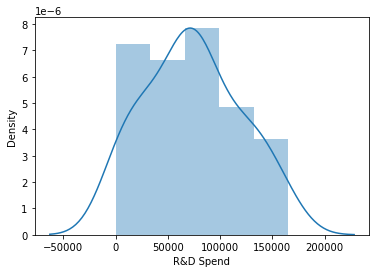

In [7]:
# Displot 
sns.distplot(data['R&D Spend'])

D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

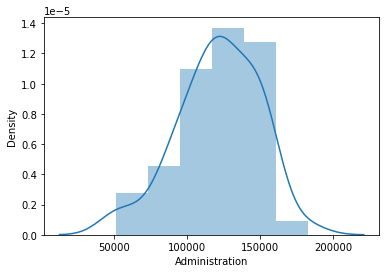

In [8]:
sns.distplot(data['Administration'])

D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

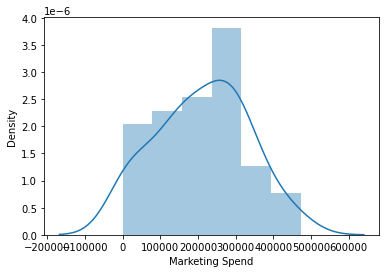

In [9]:
sns.distplot(data['Marketing Spend'])

D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

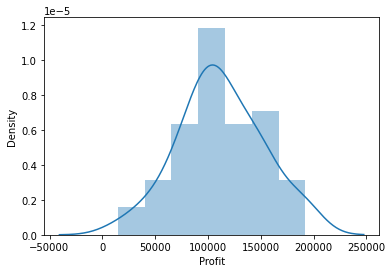

In [10]:
sns.distplot(data['Profit'])

In [11]:
data.skew()

C:\Users\Anup sharma\AppData\Local\Temp\ipykernel_16632\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

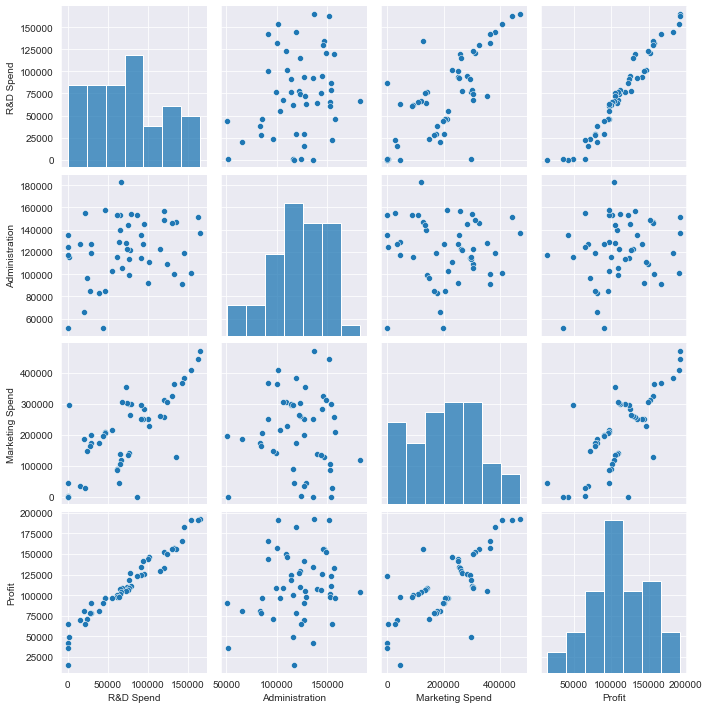

In [12]:
#scatterplot between variable along with histogram
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [13]:
# Rename the columns name
data=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


{'whiskers': [<matplotlib.lines.Line2D at 0x2847be78cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2847be802b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2847be78a00>],
 'medians': [<matplotlib.lines.Line2D at 0x2847be80850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2847be80b20>],
 'means': []}

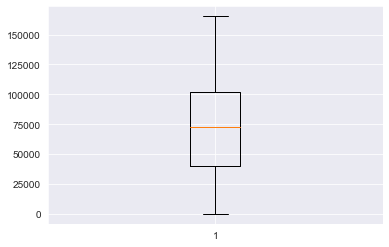

In [14]:
# BOX plot
data1=data.RDS
plt.boxplot(data1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2847c0c54c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2847c0c5a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2847c0c5250>],
 'medians': [<matplotlib.lines.Line2D at 0x2847c0d0040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2847c0d0310>],
 'means': []}

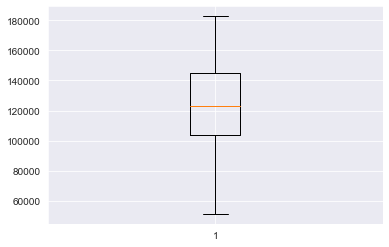

In [15]:
data1=data.ADMS
plt.boxplot(data1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2847c120d00>,
 'caps': [<matplotlib.lines.Line2D at 0x2847c12f2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2847c120a90>],
 'medians': [<matplotlib.lines.Line2D at 0x2847c12f880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2847c12fb50>],
 'means': []}

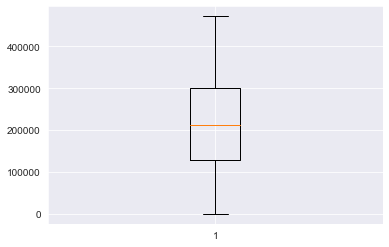

In [16]:
data1=data.MKTS
plt.boxplot(data1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2847c182a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2847c182fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2847c182760>],
 'medians': [<matplotlib.lines.Line2D at 0x2847c1935b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2847c193880>],
 'means': []}

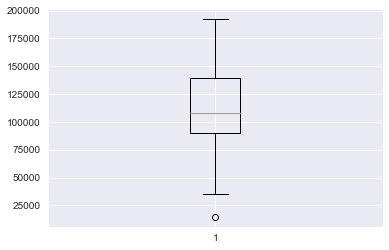

In [17]:
data1=data.Profit
plt.boxplot(data1)

In [18]:
# preparing model, build model
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data).fit()


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        18:19:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [21]:
#t and p value
model.tvalues , model.pvalues

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RDS          2.634968e-22
 ADMS         6.017551e-01
 MKTS         1.047168e-01
 dtype: float64)

In [22]:
# R squared value
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [23]:
# simple linear regression model with rd_spend and profit
m1=smf.ols('Profit~RDS',data=data).fit()
#RDS contributes 94.5% variance to profit which is very high and enough to determine the profit. 
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           3.50e-32
Time:                        18:19:45   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDS            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# t and p value
m1.tvalues , m1.pvalues

(Intercept    19.320288
 RDS          29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64)

In [25]:
# R squared value
m1.rsquared , m1.rsquared_adj

(0.9465353160804392, 0.9454214684987816)

In [26]:
## simple linear regression model with adms and profit
m2=smf.ols('Profit~ADMS',data=data).fit()
#ADMS contributes 4% variance to profit which is good.
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 29 Mar 2023   Prob (F-statistic):              0.162
Time:                        18:19:45   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADMS           0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
m2.tvalues , m2.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [28]:
# R squared value
m2.rsquared , m2.rsquared_adj

(0.04028714077757223, 0.020293122877105052)

In [29]:
## simple linear regression model with mkts and profit
m3=smf.ols('Profit~MKTS',data=data).fit()
m3.tvalues , m1.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64)

In [30]:
# calculating VIF(VARIABLE INFLATION FACTORS)
rsq_rds=smf.ols("RDS~ADMS+MKTS",data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)
rsq_adms=smf.ols("ADMS~RDS+MKTS",data=data).fit().rsquared
vif_adms=1/(1-rsq_adms)
rsq_mkts=smf.ols("MKTS~RDS+ADMS",data=data).fit().rsquared
vif_mkts=1/(1-rsq_mkts)
# storing vif values in a data frames
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_rds,vif_adms,vif_mkts]}
Vif_df=pd.DataFrame(d1)
Vif_df



,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


In [31]:
#residual analysis
#test for normality of residual(q-q plot)

In [32]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [33]:
pred=model.predict()

In [34]:
pred

array([192521.25289008, 189156.76823226, 182147.2790962 , 173696.70002553,
       172139.51418327, 163580.7805712 , 158114.09666865, 160021.36304781,
       151741.69969865, 154884.68410995, 135509.01636714, 135573.71296074,
       129138.05418243, 127487.99166275, 149548.64633453, 146235.1599852 ,
       116915.40540144, 130192.44720781, 129014.2268059 , 115635.21636716,
       116639.6692309 , 117319.45164029, 114706.98171695, 109996.61522126,
       113362.96611314, 102237.72506481, 110600.5753503 , 114408.07145684,
       101660.02600497, 101794.98345176,  99452.37293606,  97687.85627575,
        99001.32898549,  97915.00780465,  89039.27374116,  90511.59956753,
        75286.17458546,  89619.5377079 ,  69697.43064804,  83729.01197692,
        74815.95399105,  74802.55623866,  70620.41182056,  60167.03996335,
        64611.3549157 ,  47650.64968691,  56166.20685261,  46490.58898335,
        49171.38815763,  48215.1341113 ])

In [35]:
data['Profit']

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

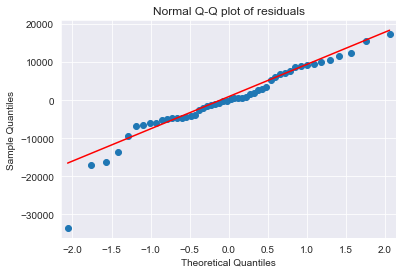

In [36]:
qqplot=sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()
#It's almost normal except for a few outliers

D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

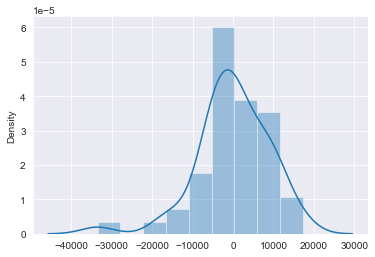

In [37]:
sns.distplot(model.resid)

In [38]:
model

In [39]:
list(np.where(model.resid<-30000))


[array([49], dtype=int64)]

# residual plot for homoscedasticity

In [40]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

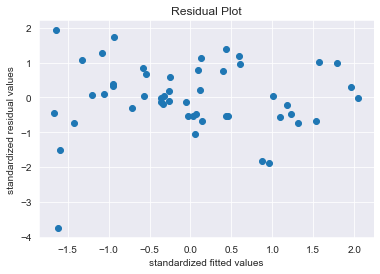

In [41]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 
# It is almost similarly distributed about the mean 0.
# There is an outlier point at -4.

eval_env: 1


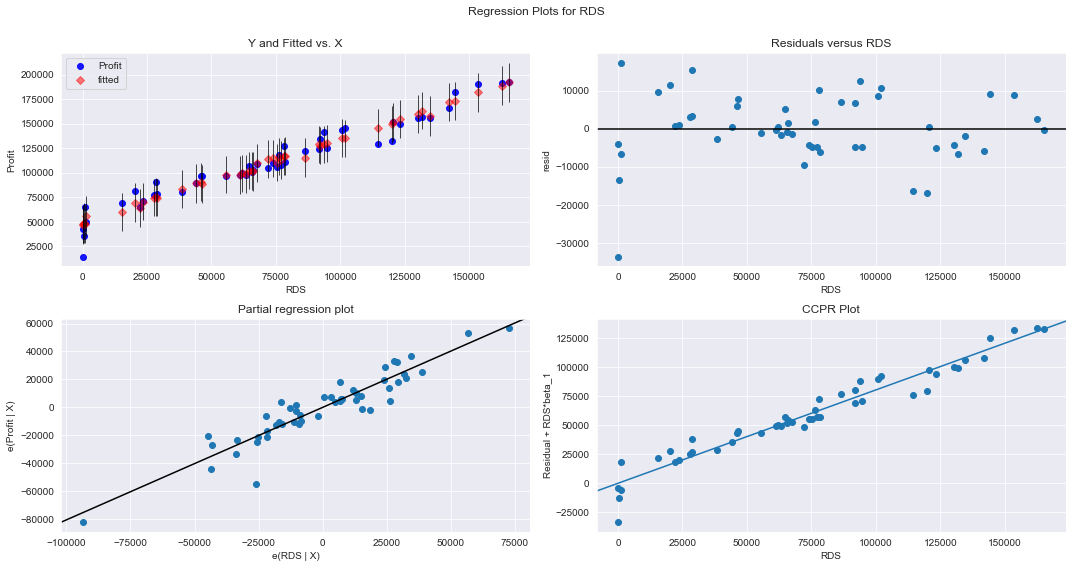

In [42]:
# residual vs regressors
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()


eval_env: 1


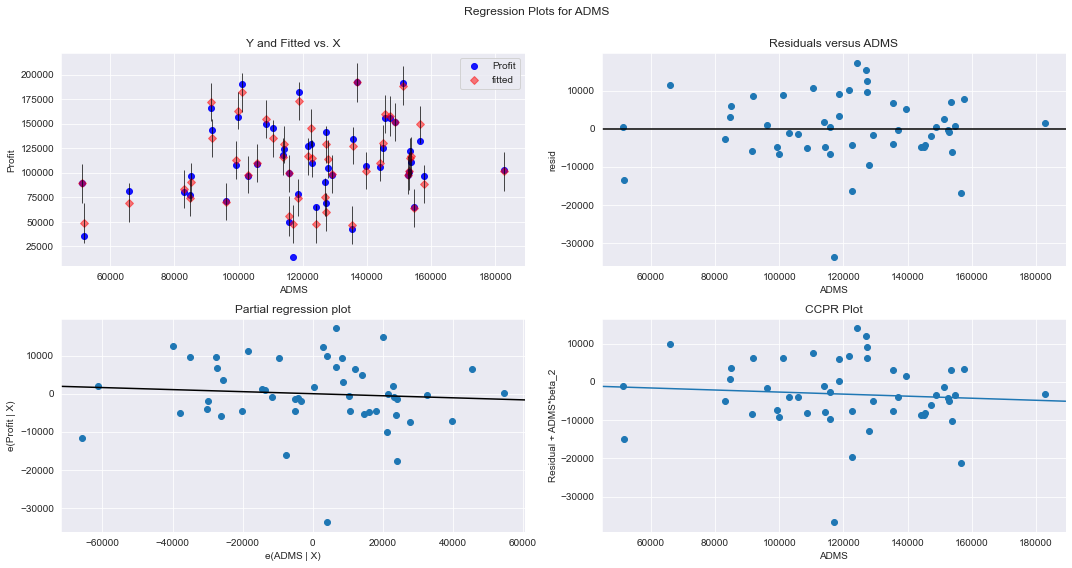

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()


eval_env: 1


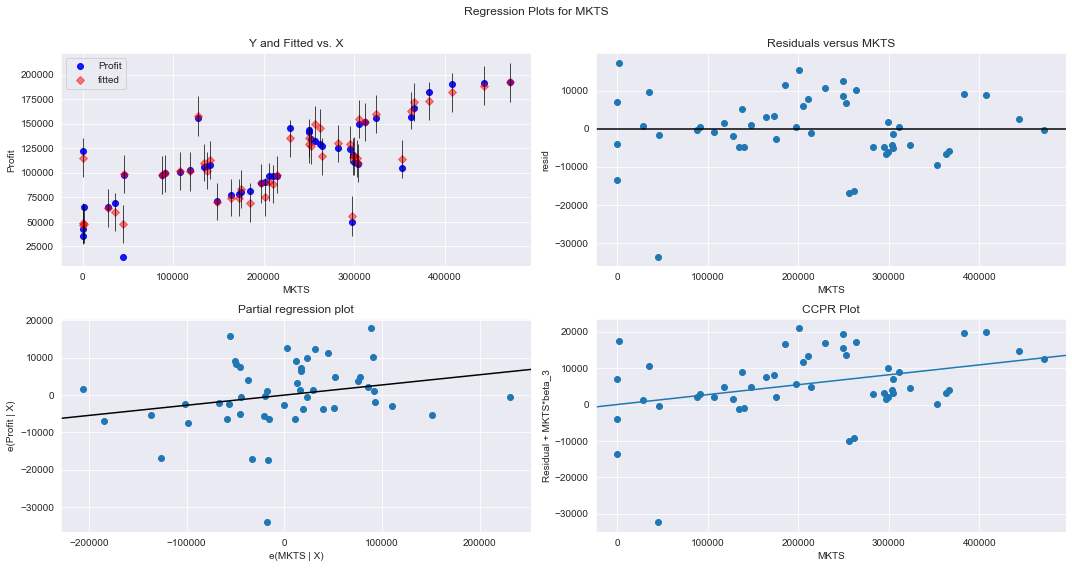

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()


In [45]:
# model delection diagnostics
#detecting influencers/outliers
#cook distance

In [46]:
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

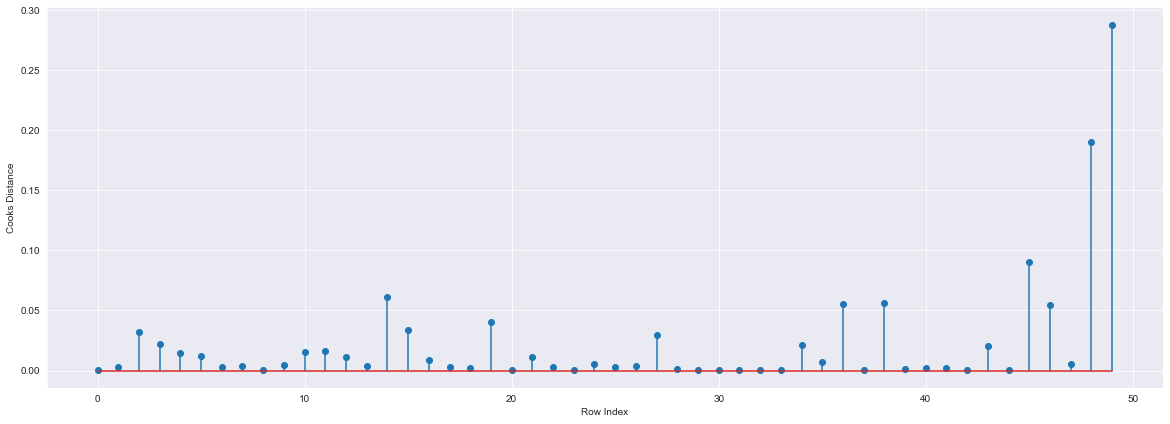

In [47]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()
#we can remove the arg max value

In [48]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)


(49, 0.2880822927543264)

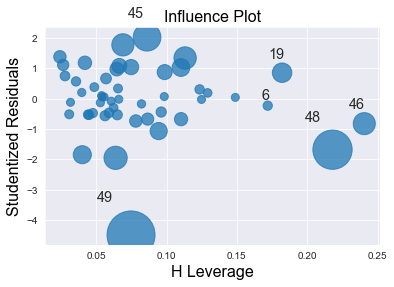

In [49]:
# high influence point
influence_plot(model)
plt.show()


In [50]:
data.shape

(50, 5)

In [51]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff


0.36

In [52]:
data[data.index.isin([49])] 


,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [53]:
# improving the model
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [54]:
# build model
final=smf.ols('Profit~RDS+ADMS+MKTS',data=data1).fit()

In [55]:
(final.rsquared,final.aic,final.bic)

(0.9613162435129847, 1020.5652974526367, 1028.1325786450793)

In [56]:
model_influence_v=final.get_influence()
(c_v,_)=model_influence_v.cooks_distance


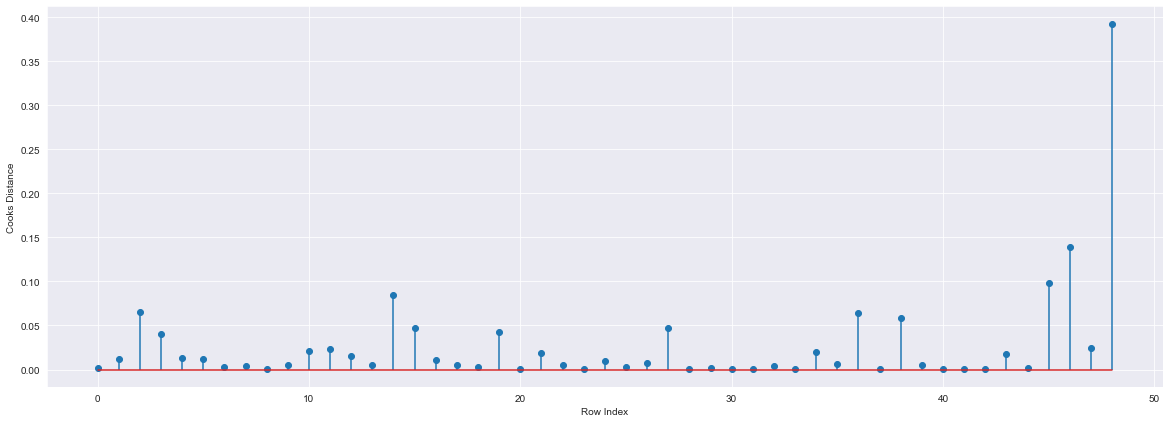

In [57]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_v,5));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()


In [58]:
(np.argmax(c_v),np.max(c_v))

(48, 0.39274420556321443)

In [59]:
data2=data1.drop(data1.index[[48]],axis=0)
data2


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [60]:
 model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.03e-31
Time:                        18:19:53   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS            0.7895      0.036     21.718      0.000       0.716       0.863
ADMS          -0.0633      0.044     -1.442      0.156      -0.152       0.025
MKTS           0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
model_influence_1=model.get_influence()
(c_v,_)=model_influence_1.cooks_distance

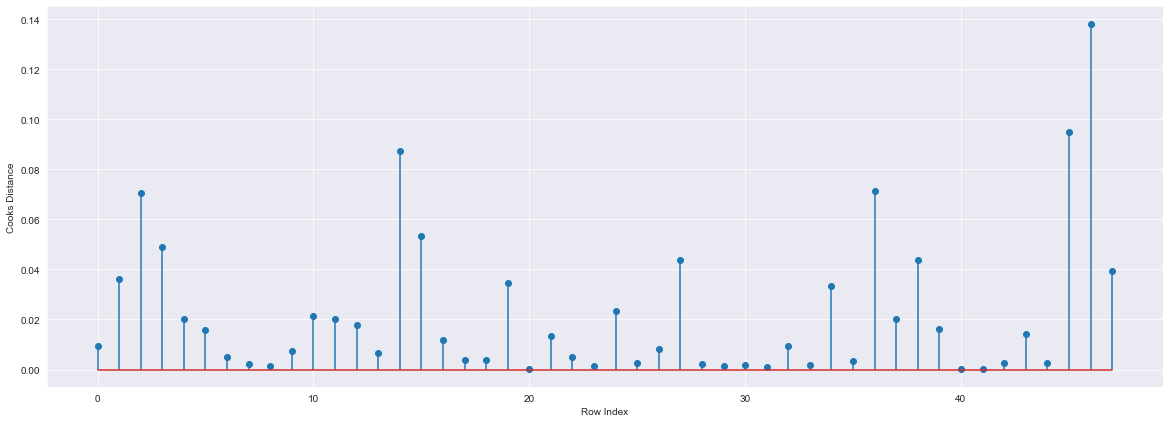

In [62]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_v,5));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()
 

In [63]:
(np.argmax(c_v),np.max(c_v))

(46, 0.13829133994334297)

In [64]:
data3=data2.drop(data2.index[[46]],axis=0)
data3


,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
final_influence_2=smf.ols('Profit~RDS+ADMS+MKTS',data=data3).fit()
final_influence_2.summary()
#Best values of R-Square. AIC values have come down. Therefore, this would be the best model. 
#Conclusion:
#From all the models, it is evident that the model is higher Rsquared value is , with a final_influence_2 value of 0.961.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.12e-30
Time:                        18:19:54   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
RDS            0.7642      0.041     18.704      0.000       0.682       0.847
ADMS          -0.0532      0.044     -1.202      0.236      -0.142       0.036
MKTS           0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model_influence_3=final_influence_2.get_influence()
(c_v,_)=model_influence_3.cooks_distance

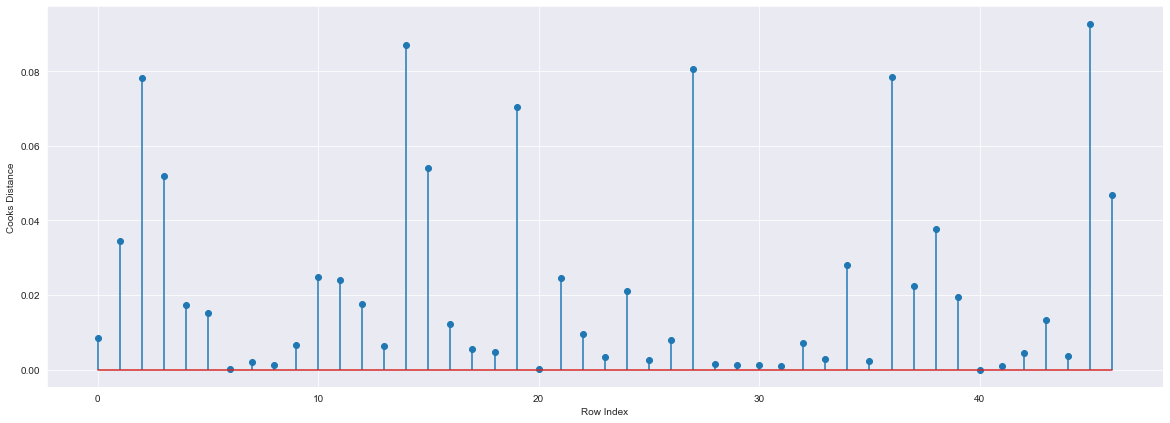

In [67]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_v,5));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()
#values are all good. None considerably high values. This is good.

In [68]:
(np.argmax(c_v),np.max(c_v))

(45, 0.09283373205094168)

In [69]:
final=smf.ols('Profit~RDS+ADMS+MKTS',data=data).fit()
final.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        18:19:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
(final.rsquared,final.aic,final.bic)

(0.9507459940683246, 1058.7714985998055, 1066.419590621518)

In [71]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':60000,"ADMS":80000,"MKTS":130000},index=[0])
new_data


,RDS,ADMS,MKTS
0,60000,80000,130000


In [72]:
# Manual Prediction of Price
final.predict(new_data)


0    99859.466937
dtype: float64

In [73]:
# Automatic Prediction of Profit with 90.02% accurcy
pred_y=final.predict(data3)
pred_y


0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
47     46490.588983
dtype: float64

In [74]:
#table containing R^2 value for each prepared model
d2={'Prep_Models':['Model','Final'],'Rsquared':[model.rsquared,final.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.962677
1,Final,0.950746


Conclusion:
From all the models, it is evident that the model is higher Rsquared value is model, with a value of 0.962.
Model is the best model to predict profit with a better accuracy, since it has the highest rsquared value.